# Import Libraries

In [16]:
import numpy as np
import pandas as pd
import pip
import matplotlib.pyplot as plt
import os
from PIL import Image
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras.preprocessing.image import img_to_array
import h5py
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import json
import gzip
import shutil

# Import example image and display


In [2]:
dataset_path = "food-101"
image_class = "pancakes"
image_id = "101644"

image_path = os.path.join(dataset_path, "images", image_class, f"{image_id}.jpg")

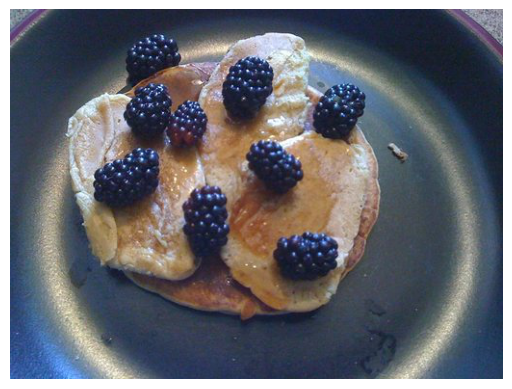

In [3]:
image = Image.open(image_path)
plt.imshow(image)
plt.axis("off")
plt.show()

# Checking the size of the images for "pancakes" class

In [4]:

pancakes_path = "food-101/images/pancakes" 

In [5]:

image_sizes = []

for filename in os.listdir(pancakes_path):
    file_path = os.path.join(pancakes_path, filename)
    try:
        # Open image and get its size
        with Image.open(file_path) as img:
            image_sizes.append(img.size) 
    except Exception as e:
        print(f"Could not open {filename}: {e}")

In [6]:
# Display the first 5 image sizes
image_sizes[:10]

[(512, 512),
 (512, 288),
 (382, 512),
 (512, 512),
 (512, 512),
 (512, 512),
 (512, 512),
 (512, 512),
 (512, 341),
 (287, 512)]

## Zero padding and resizing image as 224x224

In [4]:
def resize_with_padding(image, target_size=(224, 224)):
    image.thumbnail(target_size, Image.LANCZOS)
    new_image = Image.new("RGB", target_size, (0, 0, 0))
    new_image.paste(image, ((target_size[0] - image.width) // 2,
                            (target_size[1] - image.height) // 2))
    return new_image

In [13]:
pancakes_path = "food-101/images/pancakes"

processed_images = []

for filename in os.listdir(pancakes_path):
    file_path = os.path.join(pancakes_path, filename)
    
    if filename.lower().endswith('.jpg'):
        try:
            with Image.open(file_path) as img:
                resized_img = resize_with_padding(img)
                processed_images.append(resized_img)
        
        except Exception as e:
            print(f"Could not process {filename}: {e}")

### Plotting the results for validation

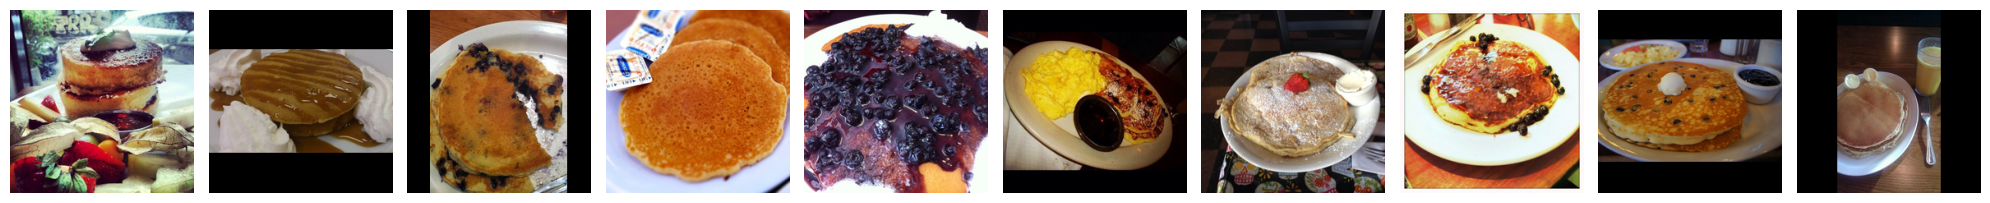

In [14]:
plt.figure(figsize=(20, 4))

for i in range(10):
    plt.subplot(1, 10, i + 1)
    plt.imshow(processed_images[i])
    plt.axis("off")

plt.tight_layout()
plt.show()

# PREPROCESS IMAGES (ONE CLASS)


In [22]:
class preprocess_class():
    def __init__(self, class_name, class_folder, output_directory, resnet_model):
        self.class_name = class_name
        self.class_folder = class_folder
        self.output_directory = output_directory
        self.resnet_model = resnet_model

    def resize_with_padding(self, image, target_size=(224, 224)):
        image.thumbnail(target_size, Image.LANCZOS)
        new_image = Image.new("RGB", target_size, (0, 0, 0))
        new_image.paste(image, ((target_size[0] - image.width) // 2,
                                (target_size[1] - image.height) // 2))
        return new_image

    def resnet_predict(self, image):
        if image.size != (224, 224):
            image = image.resize((224, 224))
        image_array = img_to_array(image) / 255
        image_array = np.expand_dims(image_array, axis=0)
        image_array = preprocess_input(image_array)
        features = self.resnet_model.predict(image_array)
        features = features.flatten().tolist()
        return features

    def feature_extract(self):
        features_list = []
        labels_list = []
        for filename in os.listdir(self.class_folder):
            file_path = os.path.join(self.class_folder, filename)
            if filename.lower().endswith(('.png', '.jpg', '.jpeg')):
                try:
                    with Image.open(file_path) as img:
                        resized_img = self.resize_with_padding(img)
                        features = self.resnet_predict(resized_img)
                        features_list.append(features)
                        labels_list.append(self.class_name)
                except Exception as e:
                    print(f"Could not process {filename}: {e}")
        return features_list, labels_list

    def store_data(self):
        features_list, labels_list = self.feature_extract()
        output_data = {
            "features": features_list,
            "labels": labels_list
        }
        output_dir = "processed_data"
        output_file = os.path.join(output_dir, f"{self.class_name}_features.json.gz")
        os.makedirs(output_dir, exist_ok=True)
        with gzip.open(output_file, "wt") as gz_file:
            json.dump(output_data, gz_file)
        print(f"Data saved directly to {output_file}")

In [12]:
class_name="pancakes"
class_folder="food-101/images/pancakes"
output_directory="food-101/preproccesed_datas"
resnet_model = ResNet50(weights='imagenet', include_top=False, input_shape=(224, 224, 3))


In [13]:
Pancake=preprocess_class(class_name,class_folder,output_directory,resnet_model)

In [14]:
Pancake.store_data()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 465ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 320ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step
1/1 ━━━━━━

In [21]:
class data_split():
    def __init__(self, class_name, data_set_dir):
        self.class_name = class_name
        self.data_set_dir = data_set_dir

    def split(self):
        train_txt_path = f"{self.data_set_dir}/meta/train.txt"
        test_txt_path = f"{self.data_set_dir}/meta/test.txt" 
        
        source_dir = f"{self.data_set_dir}/images"
        train_dir = os.path.join("data_split/train", self.class_name)
        test_dir = os.path.join("data_split/test", self.class_name)
        val_dir = os.path.join("data_split/validation", self.class_name)
        
        os.makedirs(train_dir, exist_ok=True)
        os.makedirs(test_dir, exist_ok=True)
        os.makedirs(val_dir, exist_ok=True)

    def copy_images_for_class(self, txt_path, destination_dir, class_name):
        with open(txt_path, 'r') as file:
            for line in file:
                line_class, image_id = line.strip().split('/')
                if line_class == class_name:
                    image_name = image_id + ".jpg"
                    source_image_path = os.path.join(self.source_dir, class_name, image_name)
                    destination_image_path = os.path.join(destination_dir, image_name)
                    if os.path.exists(source_image_path):
                        shutil.copy(source_image_path, destination_image_path)
                    else:
                        print(f"Image {source_image_path} not found.")
    
    copy_images_for_class(train_txt_path, train_dir, self.class_name)
    
    test_images = []
    with open(test_txt_path, 'r') as file:
        for line in file:
            line_class, image_id = line.strip().split('/')
            if line_class == self.class_name:
                image_name = image_id + ".jpg"
                source_image_path = os.path.join(self.source_dir, self.class_name, image_name)
                test_images.append(source_image_path)
    
    test_split, val_split = train_test_split(test_images, test_size=0.5, random_state=42)
    
    def copy_split_images(image_paths, destination_dir):
        for image_path in image_paths:
            if os.path.exists(image_path):
                shutil.copy(image_path, os.path.join(destination_dir, os.path.basename(image_path)))
            else:
                print(f"Image {image_path} not found.")
    
    copy_split_images(test_split, test_dir)
    copy_split_images(val_split, val_dir)
    
    print(f"Images for class '{self.class_name}' have been split into train, test, and validation directories.")

Images have been split into train, test, and validation directories.


# TRAIN,TEST,VALIDATION SPLIT

In [27]:
class ImageDataSplitter:
    def __init__(self, train_txt_path, test_txt_path, source_dir, train_dir, test_dir, val_dir):
        self.train_txt_path = train_txt_path
        self.test_txt_path = test_txt_path
        self.source_dir = source_dir
        self.train_dir = train_dir
        self.test_dir = test_dir
        self.val_dir = val_dir

        os.makedirs(self.train_dir, exist_ok=True)
        os.makedirs(self.test_dir, exist_ok=True)
        os.makedirs(self.val_dir, exist_ok=True)

    def copy_images(self, txt_path, base_dir, split_type):
        with open(txt_path, 'r') as file:
            class_images = {}
            for line in file:
                class_name, image_id = line.strip().split('/')
                image_name = image_id + ".jpg"
                source_image_path = os.path.join(self.source_dir, class_name, image_name)
                
                if class_name not in class_images:
                    class_images[class_name] = []
                class_images[class_name].append(source_image_path)
            
            for class_name, images in class_images.items():
                class_dir = os.path.join(base_dir, class_name)
                os.makedirs(class_dir, exist_ok=True)
                for image_path in images:
                    if os.path.exists(image_path):
                        shutil.copy(image_path, os.path.join(class_dir, os.path.basename(image_path)))
                    else:
                        print(f"Image {image_path} not found.")

    def split_and_copy_test_images(self):
        test_images_by_class = {}
        with open(self.test_txt_path, 'r') as file:
            for line in file:
                class_name, image_id = line.strip().split('/')
                image_name = image_id + ".jpg"
                source_image_path = os.path.join(self.source_dir, class_name, image_name)
                
                if class_name not in test_images_by_class:
                    test_images_by_class[class_name] = []
                test_images_by_class[class_name].append(source_image_path)

        for class_name, images in test_images_by_class.items():
            test_images, val_images = train_test_split(images, test_size=0.5, random_state=42)
            
            test_class_dir = os.path.join(self.test_dir, class_name)
            os.makedirs(test_class_dir, exist_ok=True)
            for image_path in test_images:
                if os.path.exists(image_path):
                    shutil.copy(image_path, os.path.join(test_class_dir, os.path.basename(image_path)))
            
            val_class_dir = os.path.join(self.val_dir, class_name)
            os.makedirs(val_class_dir, exist_ok=True)
            for image_path in val_images:
                if os.path.exists(image_path):
                    shutil.copy(image_path, os.path.join(val_class_dir, os.path.basename(image_path)))

    def split_data(self):
        self.copy_images(self.train_txt_path, self.train_dir, split_type='train')
        self.split_and_copy_test_images()
        print("Images have been split into train, test, and validation directories.")

In [29]:
train_txt_path = "food-101/meta/train.txt"
test_txt_path = "food-101/meta/test.txt"
source_dir = "food-101/images"
train_dir = "Food-101_splitted/train_set"
test_dir = "Food-101_splitted/test_set"
val_dir = "Food-101_splitted/validation_set"

splitter = ImageDataSplitter(train_txt_path, test_txt_path, source_dir, train_dir, test_dir, val_dir)
splitter.split_data()


Images have been split into train, test, and validation directories.
